In [1]:
import pandas as pd
import numpy as np


import time, warnings
import datetime as dt
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns


# Preparing the data(EDA)

In [2]:
sales_data=pd.read_excel('sales_data.xlsx',encoding='unicode_escape')

In [3]:
sales_data

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1,...,2592.18,2409.71,12,61,37,14,1067.92,5674.65,3916.53,1327.44
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1,...,2807.66,4106.19,1,13,24,44,30.25,3143.69,2205.47,5646.55
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1,...,713.94,2861.90,0,6,12,25,0.00,707.98,2560.91,3990.80
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1,...,997.02,1260.08,0,10,13,21,0.00,1908.99,2025.05,3058.23
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1,...,2725.66,768.46,6,9,27,13,501.34,1197.83,3004.77,1559.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4996,173987,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4997,174004,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,0,1,0.00,0.00,0.00,117.49
4998,174038,1,117.49,117.49,4.99,4.99,2021-04-01,2021-04-01,0.00,207,...,0.00,0.00,0,0,1,0,0.00,0.00,117.49,0.00


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 5000 non-null   int64         
 1   TOTAL_ORDERS               5000 non-null   int64         
 2   REVENUE                    5000 non-null   float64       
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64       
 4   CARRIAGE_REVENUE           5000 non-null   float64       
 5   AVERAGESHIPPING            5000 non-null   float64       
 6   FIRST_ORDER_DATE           5000 non-null   datetime64[ns]
 7   LATEST_ORDER_DATE          5000 non-null   datetime64[ns]
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64       
 9   DAYSSINCELASTORDER         5000 non-null   int64         
 10  MONDAY_ORDERS              5000 non-null   int64         
 11  TUESDAY_ORDERS             5000 non-null   int64         
 12  WEDNES

In [5]:
sales_data.shape

(5000, 40)

In [6]:
sales_data.columns

Index(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'],
    

In [7]:
sales_data=sales_data.drop(sales_data.iloc[:,10:],axis=1)# drop the not required featured from original data

In [8]:
sales_data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER
0,22,124,11986.54,96.67,529.59,4.27,2016-12-30,2021-10-24,14.19,1
1,29,82,11025.96,134.46,97.92,1.19,2018-03-31,2021-10-24,15.89,1
2,83,43,7259.69,168.83,171.69,3.99,2017-11-30,2021-10-24,33.12,1
3,95,44,6992.27,158.92,92.82,2.11,2019-04-09,2021-10-24,21.11,1
4,124,55,6263.44,113.88,179.04,3.26,2020-10-23,2021-10-24,6.65,1


In [9]:
sales_data.isnull().sum(axis=0)#check for missing value

CustomerID              0
TOTAL_ORDERS            0
REVENUE                 0
AVERAGE_ORDER_VALUE     0
CARRIAGE_REVENUE        0
AVERAGESHIPPING         0
FIRST_ORDER_DATE        0
LATEST_ORDER_DATE       0
AVGDAYSBETWEENORDERS    0
DAYSSINCELASTORDER      0
dtype: int64

In [10]:
sales_data.REVENUE.min()#checking any -ve value in Revenue column

38.5

In [11]:
sales_data=sales_data.drop(['AVERAGE_ORDER_VALUE','CARRIAGE_REVENUE','AVERAGESHIPPING','AVGDAYSBETWEENORDERS'],axis=1)

In [12]:
sales_data.head()

,CustomerID,TOTAL_ORDERS,REVENUE,FIRST_ORDER_DATE,LATEST_ORDER_DATE,DAYSSINCELASTORDER
0,22,124,11986.54,2016-12-30,2021-10-24,1
1,29,82,11025.96,2018-03-31,2021-10-24,1
2,83,43,7259.69,2017-11-30,2021-10-24,1
3,95,44,6992.27,2019-04-09,2021-10-24,1
4,124,55,6263.44,2020-10-23,2021-10-24,1


In [13]:
#remove rows where customerID are NA
sales_data.dropna(subset=['CustomerID'],how='all',inplace=True)
sales_data.shape #here are no any NA value in CustomerID

(5000, 6)

In [14]:
sales_data.head(5)

,CustomerID,TOTAL_ORDERS,REVENUE,FIRST_ORDER_DATE,LATEST_ORDER_DATE,DAYSSINCELASTORDER
0,22,124,11986.54,2016-12-30,2021-10-24,1
1,29,82,11025.96,2018-03-31,2021-10-24,1
2,83,43,7259.69,2017-11-30,2021-10-24,1
3,95,44,6992.27,2019-04-09,2021-10-24,1
4,124,55,6263.44,2020-10-23,2021-10-24,1


# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase
    
FREQUENCY (F): Total number of purchases
    
MONETARY VALUE (M): Total money this customer spent.
    
We will create those 3 customer attributes for each customer.

#### To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase

In [15]:
#We have in our data set first order date and latest order date

In [16]:
FIRST_ORDER_DATE=sales_data.iloc[:,3]
FIRST_ORDER_DATE

0      2016-12-30
1      2018-03-31
2      2017-11-30
3      2019-04-09
4      2020-10-23
          ...    
4995   2021-04-01
4996   2021-04-01
4997   2021-04-01
4998   2021-04-01
4999   2014-06-26
Name: FIRST_ORDER_DATE, Length: 5000, dtype: datetime64[ns]

In [17]:
LATEST_ORDER_DATE = sales_data['LATEST_ORDER_DATE']

In [18]:
LATEST_ORDER_DATE

0      2021-10-24
1      2021-10-24
2      2021-10-24
3      2021-10-24
4      2021-10-24
          ...    
4995   2021-04-01
4996   2021-04-01
4997   2021-04-01
4998   2021-04-01
4999   2021-04-01
Name: LATEST_ORDER_DATE, Length: 5000, dtype: datetime64[ns]

In [19]:
delta=(LATEST_ORDER_DATE-FIRST_ORDER_DATE).dt.days

In [20]:
delta

0       1759
1       1303
2       1424
3        929
4        366
        ... 
4995       0
4996       0
4997       0
4998       0
4999    2471
Length: 5000, dtype: int64

In [21]:
sales_data['delta']=delta

In [22]:
sales_data

,CustomerID,TOTAL_ORDERS,REVENUE,FIRST_ORDER_DATE,LATEST_ORDER_DATE,DAYSSINCELASTORDER,delta
0,22,124,11986.54,2016-12-30,2021-10-24,1,1759
1,29,82,11025.96,2018-03-31,2021-10-24,1,1303
2,83,43,7259.69,2017-11-30,2021-10-24,1,1424
3,95,44,6992.27,2019-04-09,2021-10-24,1,929
4,124,55,6263.44,2020-10-23,2021-10-24,1,366
...,...,...,...,...,...,...,...
4995,173946,1,117.49,2021-04-01,2021-04-01,207,0
4996,173987,1,117.49,2021-04-01,2021-04-01,207,0
4997,174004,1,117.49,2021-04-01,2021-04-01,207,0
4998,174038,1,117.49,2021-04-01,2021-04-01,207,0


### Calculate Recency,Frequency,Monitory values

In [23]:
#Create RFM Modelling scores for each customer
rfmTable =sales_data.groupby('CustomerID').agg({'delta': lambda x:x.max(),
                                               'CustomerID': lambda x: len(x),
                                               'REVENUE': lambda x: x.sum()}) 
                                       
#Rename column names to Recency, Frequency and Monetary
rfmTable.rename(columns={'delta': 'recency',
                        'CustomerID':'frequency',
                        'REVENUE': 'monetary_value'}, inplace=True)

In [24]:
rfmTable.head(10)

#here we can say that the 1st customer recency is 548 and frequency is 1 and it monetary value is 34847.
# it means there is some sales should be

,recency,frequency,monetary_value
CustomerID,,,
1,548,1,34847.40
2,891,1,32486.98
3,1295,1,24178.97
4,1845,1,18554.49
5,1999,1,16884.99
6,2438,1,16693.78
7,1448,1,15999.94
8,1235,1,15840.36
9,1908,1,14526.72


RFM analysis involves categorising R,F and M into 3 or more categories. For convenience, 
let's create 4 categories based on quartiles
(quartiles roughly divide the sample into 4 segments equal proportion).


We are creating the quantile like 0.25,0.50,0.75 so that we can sub divide the entire dataset into 4 group base on recency,frequency,monetary value that we have calculated earlier

In [25]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.25   274.75        1.0        315.0975
0.50   774.50        1.0        966.7250
0.75  1936.75        1.0       2493.0725 <class 'pandas.core.frame.DataFrame'>


let's convert quartile information into a dictionary so that cutoffs can be picked up.

In [26]:
quartiles=quartiles.to_dict()
quartiles

{'recency': {0.25: 274.75, 0.5: 774.5, 0.75: 1936.75},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary_value': {0.25: 315.09749999999997, 0.5: 966.725, 0.75: 2493.0725}}

In the case of receny, lower is better and hence our categorising scheme need to be reverse.

In [27]:
## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
    ## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [28]:
#Calculate Add R_Quartile, F_Quartile and M_Quartile segment value columns in the existing dataset to show R, F and M segment values
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency',quartiles,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency',quartiles,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value',quartiles,))

For analysis it is critical to combine the scores to create a single score. 
Approach is to just concatenate the scores to create a 3 digit number between 111 and 444. 


In [29]:
#Calculate and Add RFMClass value column showing combined concatenated score of RFM
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfmSeg['RFMScore']=rfmSeg[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)

In [30]:
rfmSeg.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore
CustomerID,,,,,,,,
1,548,1,34847.40,2,4,1,241,7
2,891,1,32486.98,3,4,1,341,8
3,1295,1,24178.97,3,4,1,341,8
4,1845,1,18554.49,3,4,1,341,8
5,1999,1,16884.99,4,4,1,441,9


In [31]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Champion', 'Potential Customer', 'Need attention', 'Lost customer']
Score_cuts = pd.qcut(rfmSeg.RFMScore, q = 4, labels = Loyalty_Level)
rfmSeg['RFM_Loyalty_Level'] = Score_cuts.values
rfmSeg.reset_index().head()

,CustomerID,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,RFM_Loyalty_Level
0,1,548,1,34847.40,2,4,1,241,7,Champion
1,2,891,1,32486.98,3,4,1,341,8,Champion
2,3,1295,1,24178.97,3,4,1,341,8,Champion
3,4,1845,1,18554.49,3,4,1,341,8,Champion
4,5,1999,1,16884.99,4,4,1,441,9,Potential Customer


In [32]:
rfmSeg.sort_values(by=['RFMClass', 'monetary_value','RFM_Loyalty_Level'], ascending=[True, False,True])

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
57,93,1,8485.40,1,4,1,141,6,Champion
62,123,1,8215.90,1,4,1,141,6,Champion
140,225,1,6022.30,1,4,1,141,6,Champion
162,192,1,5786.92,1,4,1,141,6,Champion
169,264,1,5693.21,1,4,1,141,6,Champion
...,...,...,...,...,...,...,...,...,...
248709,2433,1,59.95,4,4,4,444,12,Lost customer
248710,2389,1,59.94,4,4,4,444,12,Lost customer
259042,2513,1,51.94,4,4,4,444,12,Lost customer


In [33]:
rfmSeg.groupby('RFMClass').agg('monetary_value').mean()

RFMClass
141    3854.640984
142    1485.448506
143     494.132690
144     201.662711
241    3917.960592
242    1706.419883
243     572.487301
244     228.303672
341    4436.719599
342    1805.158553
343     598.255679
344     231.291127
441    4598.745213
442    1530.607000
443     577.106280
444     202.806860
Name: monetary_value, dtype: float64

### Let's check the visualisation ,how the combined score arrange R,F and M

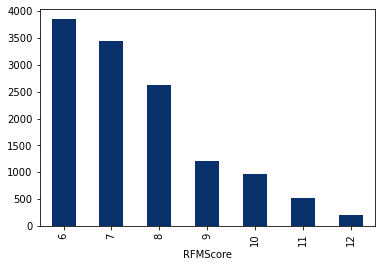

In [35]:
rfmSeg.groupby('RFMScore').agg('monetary_value').mean().plot(kind='bar', colormap='Blues_r')

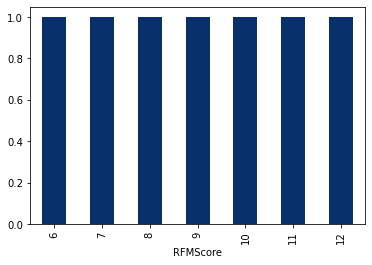

In [36]:
rfmSeg.groupby('RFMScore').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

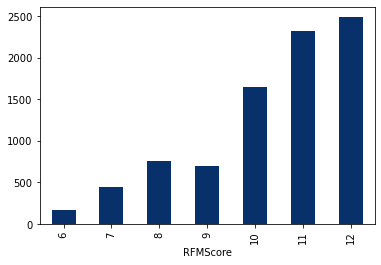

In [37]:

rfmSeg.groupby('RFMScore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

### Based on this RFM module Customer with RFM value 141 are the best customer.Other hand if  the customer is falling to RFM class  444 then company may try to offer some reward or coupon to trigger that spending  from this almost  churn out customer.

### Here company also need to think  to increase the frequency of customer.
